#### Importing all the necessary packages

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data from CSV file as Dataframe using pandas


In [18]:
source_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data = source_data.copy()
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### From the info it is observed that all the currently numeric data type and there is no  null values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### Visualizing the Distrubution of Target column

* It is clear that the dataset is highly imbalaced in target attribute.
* so we have to over sample the minority category as this huge imbalance in dataset may affect the performance of the model.

No of row in both categories for target attribute: 
 0    4520
1     480
Name: Personal Loan, dtype: int64


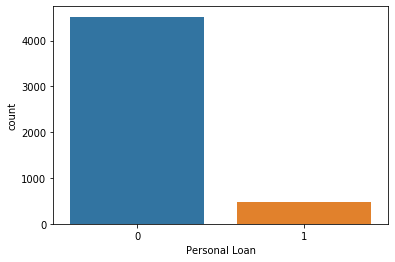

In [20]:
print("No of row in both categories for target attribute: \n {}".format(data["Personal Loan"].value_counts()))

sns.countplot(data["Personal Loan"])


##### Creating a function to convert the attributes of the dataset to correct datatype

In [21]:
def datatype_converter(df):
  #Making a list of all numeric columns
  numeric_columns = ["Age", "Experience", "Income", "Family",  "Mortgage"]
  #Changing the datatype of all numeric columns
  df[numeric_columns]  = df[numeric_columns].astype('int')
  df["CCAvg"]  = df["CCAvg"].astype('float')
  #Making a list of all categorical columns
  category_columns = ["ZIP Code", "Education", "Securities Account", "CD Account", "Online", "CreditCard", "Personal Loan"]
  #Changing the datatype of categorical columns
  df[category_columns] = df[category_columns].astype('category')
  return df


##### Over sampling the dataset with minority category

In [22]:
from imblearn.over_sampling import RandomOverSampler
#Creating a list of all independ columns
independ_columns = [i for i in data.columns if i != "Personal Loan"]
seed =3
#Converting the atributes to correct datatype before over sampling
data = datatype_converter(data)
#Seperating the independent and target attributes 
x = data[independ_columns].copy()
y = data["Personal Loan"].copy()
#Creating an instance of RandomOverSampler which will over sample the minority category equal to majority category 
over_sampler = RandomOverSampler(sampling_strategy = 'minority', random_state = seed)
x_sampled, y_sampled = over_sampler.fit_sample(x, y)

#Creating DataFrame from the over sampled data
data_sampled = pd.DataFrame(x_sampled, columns = independ_columns)
data_sampled["Personal Loan"] = y_sampled
data_sampled = datatype_converter(data_sampled)

##### Now the target column is balanced such that both the category in target column has equal no of data

No of row in both categories for target attribute: 
 1    4520
0    4520
Name: Personal Loan, dtype: int64


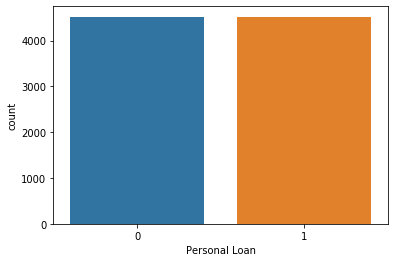

In [23]:
print("No of row in both categories for target attribute: \n {}".format(data_sampled["Personal Loan"].value_counts()))

sns.countplot(data_sampled["Personal Loan"])

* In this summary we can see that there is invalid negative value in the experience column.
* We will analyse it and make suitable adjustment.

In [24]:
data_sampled.describe()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage
count,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000
mean,2446.206858,45.148783,19.921460,105.580310,2.493363,2.830450,74.590929
std,1422.071702,11.526008,11.525851,53.598754,1.139248,2.146517,131.295538
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,1207.000000,35.000000,9.000000,59.000000,1.000000,1.000000,0.000000
50%,2425.500000,45.000000,20.000000,110.000000,2.000000,2.400000,0.000000
75%,3662.000000,55.000000,30.000000,152.000000,4.000000,4.200000,118.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


##### Univariate distribution of each attribute in dataset.
* Age, Experience and insurance are almost normally distributed.
* CCAvg column is right skewed as the mode is much less than the median and mean.
* The Mortgage is an optional column where most of the people do not have value for it.
* The dataset is equally distributed on the family size column.
* The count of users using internet banking is more than 50% and credit card users is less than 50%. We have to anayse it with respect to target column to find the weightage of it.

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']


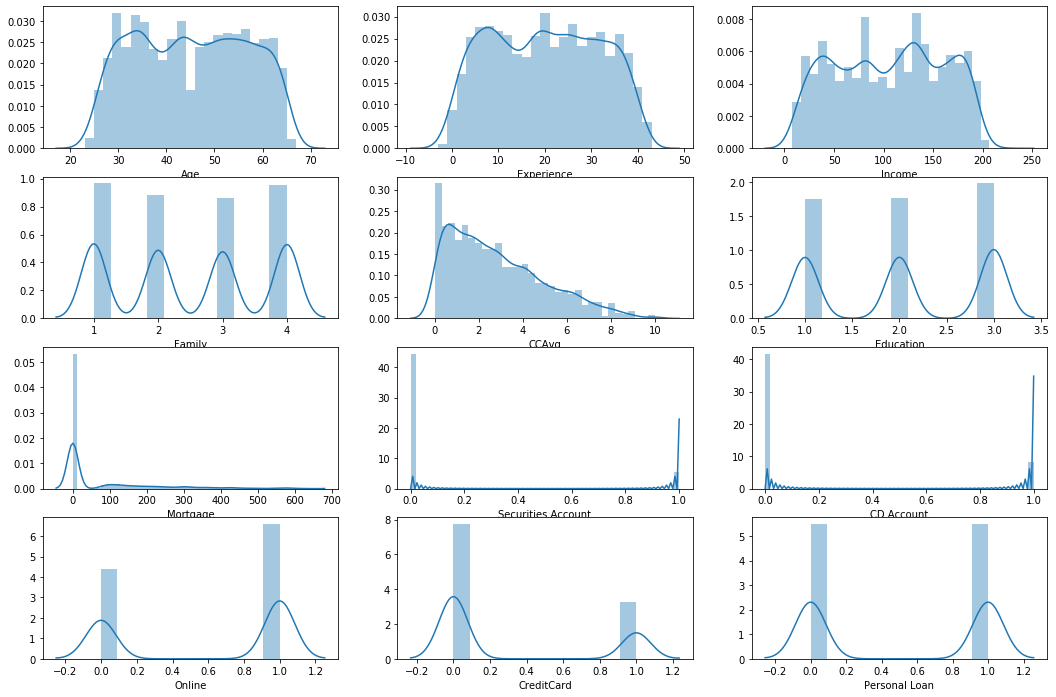

In [25]:

fig, ax = plt.subplots(nrows= 4, ncols= 3, figsize = (18, 12))

columns = [i for i in data_sampled.columns if i not in ["ID", "ZIP Code"]]
print(columns)
for  axes, column in  zip(ax.flatten(),columns) :
  sns.distplot(data_sampled[column], ax = axes)

##### Checking Outliers in numeric attributes

* There is few outliers in avg spending value on credit card.As it is spending money which can be actual value and we dont have to treat this value.
* As we saw in earlier plot, Mortgage is an optional column where majority of the count do not have value for it. So it is showing the few counts as an outlier.
* All other numeric columns do not have any unusual values. 

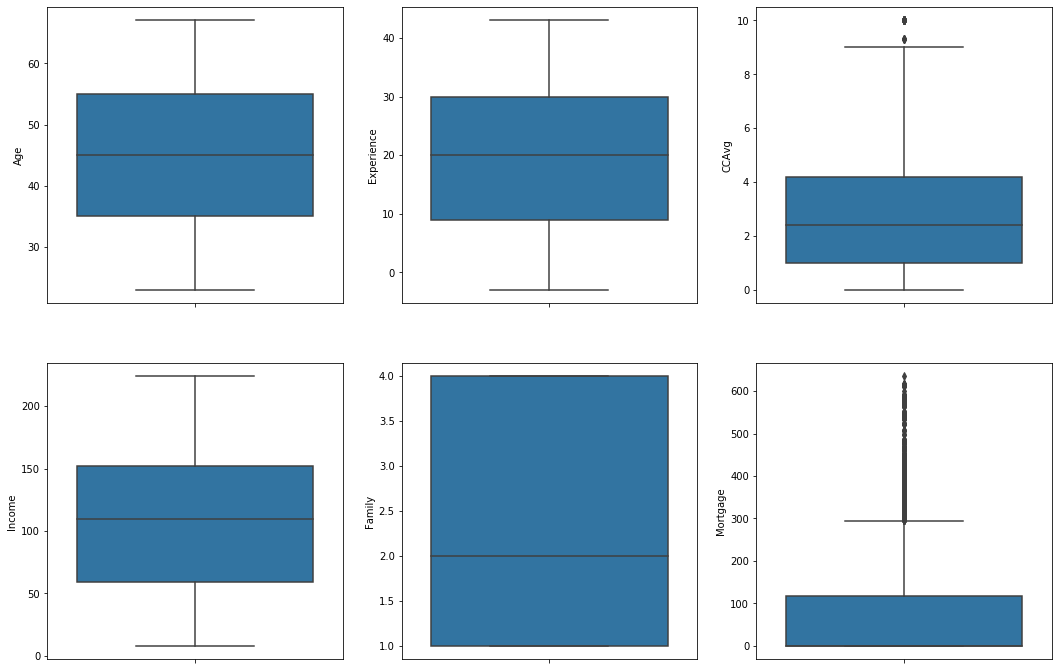

In [26]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize = (18, 12))
numeric_columns = ["Age", "Experience", "CCAvg",  "Income", "Family",  "Mortgage"]
for  axes, column in  zip(ax.flatten(),numeric_columns) :
  sns.boxplot(data_sampled[column], ax = axes, orient = "v")

##### Distribution of categorical columns with target column

* For higher education level the chances of taking loan is higher.
* CD account is directly influencing the target column as most of the CD account holders took loan.
* As the family size increases the chances of taking loan increases.
* Other 3 columns are equally distributed for both categories of target column.

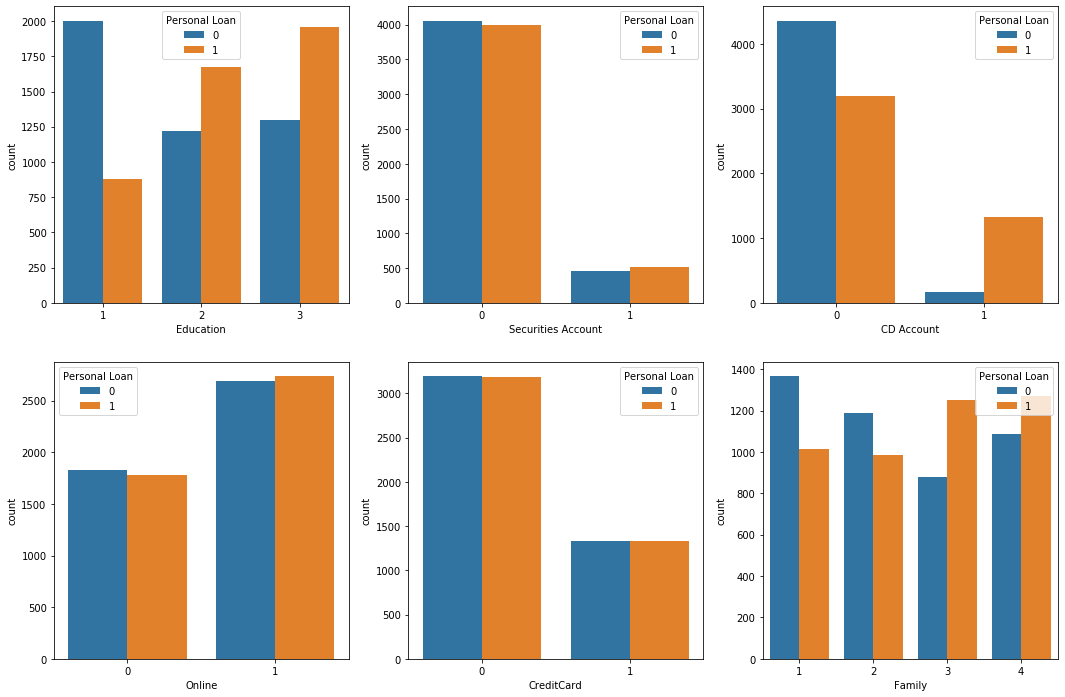

In [27]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize = (18, 12))
category_columns =  [ "Education", "Securities Account", "CD Account", "Online", "CreditCard", "Family"]
for  axes, column in  zip(ax.flatten(),category_columns) :
  sns.countplot(x = column, data = data_sampled, hue = "Personal Loan", ax = axes)

##### Range of numeric columns for the categories in target columns
* It is very clear from the plot that the mean of income of people who took loan is higher that the people who dont So income plays a major role in our prediction.
* There is a considerable difference between the mean of CCAvg for the  categories in target column.
* Age and experience is making almost same impact to the targer columns. We will further analyse it with correlation.

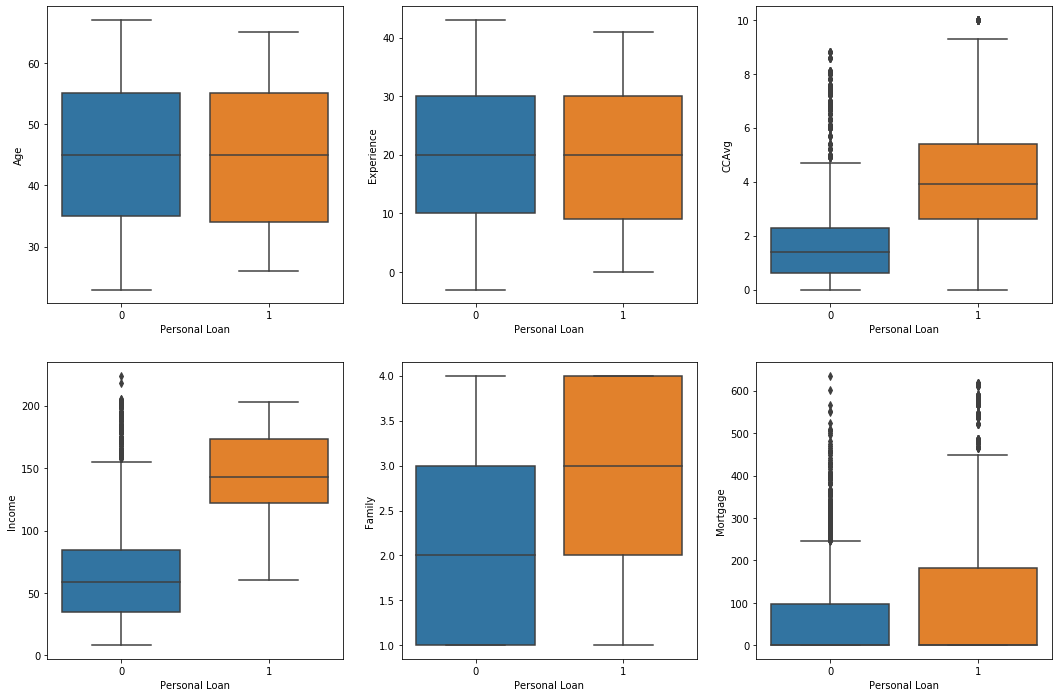

In [28]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize = (18, 12))
numeric_columns = ["Age", "Experience", "CCAvg",  "Income", "Family",  "Mortgage"]
for  axes, column in  zip(ax.flatten(),numeric_columns) :
  sns.boxplot(x = "Personal Loan", y = column, data = data_sampled, ax = axes)

##### Checking correlation between independent features

* we can see that Age and Experience are highly correlated. 
* So one of the features can be removed for target prediction as both giving same information.

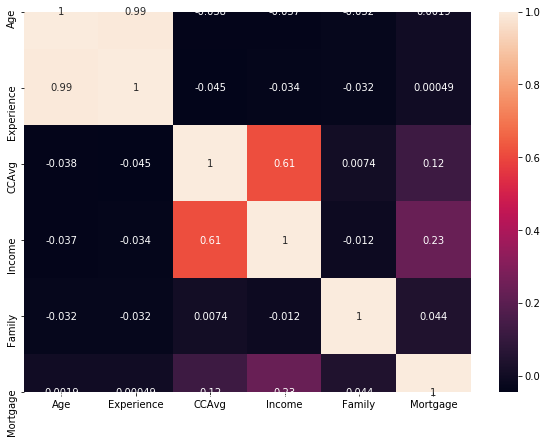

In [29]:
corr = data_sampled[numeric_columns].corr()
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr, annot = True, ax =ax)

##### Analysing the invalid values in Experience column
* We can see that the people with negative experience has low age and there is no high age people.
* So there is no chances of having high experience and we can replace the negative experience with 0

In [30]:
print("Age and count of people who have experience column as negative \n",data_sampled[data_sampled.Experience <0]["Age"].value_counts())


Age and count of people who have experience column as negative 
 25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64


#### Pipeline

* We are using Pipeline feature available in Scikit Learn to build our model.
* Pipelines helps to bulid a better readable organized model.
* It helps to process the train, test dataset seperately which refrains the model from data leakage.

---

#### Planned Steps:-

1. Preprocessing
>* Dropping ID, ZIP Code, Age columns.
>* Replacing the negative values with 0 in Experience column.


2. Encoding
>* Using OneHotEncodeer to encode the Education column
<br>
3. Scaling
>* Standard scaling the numeric feature except Mortgage.
>* Converting numeric into categorical columns for Naive Bayes Model.
<br>
4. ML Model
>* Fitting the date to machine Learning Algorithm.





In [31]:

def negativevalue(df):
  #Using Clip fucntion to make the least value Experience column to 0
  df.loc[:, ["Experience"]].clip(lower = 0, inplace = True)
  return df

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
#Gets the DataFrame and perform the transforms in specified column
column_transformer = ColumnTransformer(remainder= 'passthrough', 
                                        transformers = [('drop_column', 'drop', ["ID", "ZIP Code", "Age"]),
                                                        ('encoding', OneHotEncoder(), ["Education"]),                                                     
                                                        ('scaling', StandardScaler(),["Experience", "Income", "Family", "CCAvg"])
                                                        ])
#Combining all the Transform to make a pipeline
pipeline_model = Pipeline([('negativevalue_transform', FunctionTransformer(negativevalue)),
                           ('column_transform', column_transformer ),
                           ('model', LogisticRegression())
                           ])


In [33]:
from sklearn.model_selection import train_test_split

#Splitting Independ columns and Target column
x = data_sampled[independ_columns]
y = data_sampled["Personal Loan"]
#Splitting the train and test sample
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

####  Performance metrics for the model
>True Positive - Predicted and opted for Loan.<br>
>False Positive - Predicted but not opted for Loan.<br>
>True Negative - Not predicted and also not opted for Loan. <br>
>False Negative - Not predicted but opted for Loan. <br>

* Our objective is to target the customers who will opt for Loan.
* We are ok if we target a customer and they not opted for the loan but we should not left out with some customer who may actually opt for loan.
* In this case we should minimize the False Negative as it will directly influence our success rate. <br>

\begin{equation*}
Recall = {True Positive /(True Positive + False Negative)}
\end{equation*}

#### So we can consider Recall as a performance metrics of our model.

In [34]:
from sklearn.model_selection import GridSearchCV
#Creating many possible set of paramters for hyperparamter tuning
params_logistic = [ {
    'model':[LogisticRegression()],
    'model__penalty' : ['l1', 'l2'],
    'model__C' : np.logspace(0, 4, 10),
    'model__max_iter' : [300],
    'model__random_state' : [seed]
},
{
    'model':[LogisticRegression()],
    'model__penalty' : ['l1', 'l2'],
    'model__solver' : ['newton-cg', 'sag' , 'saga'  'liblinear'],
    'model__C' : np.logspace(0, 4, 10),
    'model__random_state' : [seed]
}
]
#Creating instance for GridSearchCV
cv_logistic = GridSearchCV(pipeline_model, params_logistic, scoring ="recall", refit = True, n_jobs= -1)


##### Logistic Regression
* Our objective is to increase the Recall as we have to reduce the false negative.
* But in this model has better Accuracy and Precision than Recall eventhough we did hyperparameter tuning to maximize the recall.

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
#Fitting the data using pipelines which will ensure all the datacleaning done seperately for both training and testing data to avoid dataleakage
cv_logistic.fit(x_train, y_train)
y_pred_logistic = cv_logistic.predict(x_test)
#creating confusion matrix for actula and predicted output
cm = confusion_matrix(y_pred_logistic, y_test,  labels = [1, 0])
cm_logistic = pd.DataFrame(cm, columns = ["Actual 1", "Actual 0"], index = ["Predicted 1", "Predicted 0"])
print("----------------------------Performance Metrics for Logistic Regression Model-----------------------")
print("Confusion Matrix \n",cm_logistic)
#Default score of the model will be recall as we gave recall as scoring parameter
print("Recall: %2.2f" %cv_logistic.score(x_test, y_test))
print("Accuracy: %2.2f" %accuracy_score(y_test, y_pred_logistic))
print("precision: %2.2f" %precision_score(y_test, y_pred_logistic))
#getting the best hyperparameters chosen by the GridSearchCV 
print("Best Hyperparameters: \n",cv_logistic.best_params_)

----------------------------Performance Metrics for Logistic Regression Model-----------------------
Confusion Matrix 
              Actual 1  Actual 0
Predicted 1      1229       112
Predicted 0       151      1220
Recall: 0.89
Accuracy: 0.90
precision: 0.92
Best Hyperparameters: 
 {'model': LogisticRegression(max_iter=300, random_state=3), 'model__C': 1.0, 'model__max_iter': 300, 'model__penalty': 'l2', 'model__random_state': 3}


In [36]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors' : [i for i in range(3, 30, 2)],
    'model__leaf_size' : [i for i in range(5, 50, 5)],
    'model__weights' : ['uniform', 'distance']
}

cv_KNN = GridSearchCV(pipeline_model, params_knn, scoring =  "recall", n_jobs= -1)

##### K-NN Model
* In this model eventhough tuning with Recall had affected the Precision and Accuracy, we got the best Recall value.
* We will check for another model and conclude performance with cross validation.

In [37]:
cv_KNN.fit(x_train, y_train)
y_pred_KNN = cv_KNN.predict(x_test)
cm = confusion_matrix(y_pred_KNN, y_test,  labels = [1, 0])
cm_KNN = pd.DataFrame(cm, columns = ["Actual 1", "Actual 0"], index = ["Predicted 1", "Predicted 0"])
print("----------------------------Performance Metrics for KNN Model----------------------------")
print("Confusion Matrix \n",cm_KNN)
print("\n")
print("Recall: %2.2f" %cv_KNN.score(x_test, y_test))
print("Accuracy: %2.2f" %accuracy_score(y_test, y_pred_KNN))
print("precision: %2.2f" %precision_score(y_test, y_pred_KNN))
print("\n")
print("Best Hyperparameters: \n",cv_KNN.best_params_)

----------------------------Performance Metrics for KNN Model----------------------------
Confusion Matrix 
              Actual 1  Actual 0
Predicted 1      1380        94
Predicted 0         0      1238


Recall: 1.00
Accuracy: 0.97
precision: 0.94


Best Hyperparameters: 
 {'model': KNeighborsClassifier(leaf_size=5, n_neighbors=11, weights='distance'), 'model__leaf_size': 5, 'model__n_neighbors': 11, 'model__weights': 'distance'}


In [38]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer
params_NB = {
    'model' : [BernoulliNB()],
    'model__alpha' : [i for i in range (1, 50)],
    'column_transform__scaling' : [KBinsDiscretizer()]
}
cv_NB = GridSearchCV(pipeline_model, params_NB, scoring = "recall",  n_jobs= -1)


##### Naive Bayes
* This model got some better recall than logistic regression but not as good as KNN.

In [39]:
cv_NB.fit(x_train, y_train)
y_pred_NB = cv_NB.predict(x_test)
cm = confusion_matrix(y_pred_NB, y_test,  labels = [1, 0])
cm_NB = pd.DataFrame(cm, columns = ["Actual 1", "Actual 0"], index = ["Predicted 1", "Predicted 0"])

print("----------------------------Performance Metrics for Naive Bayes Model----------------------------")
print("Confusion Matrix \n",cm_NB)
print("\n")
print("Recall: %2.2f" %cv_NB.score(x_test, y_test))
print("Accuracy: %2.2f" %accuracy_score(y_test, y_pred_NB))
print("precision: %2.2f" %precision_score(y_test, y_pred_NB))
print("\n")
print("Best Hyperparameters: \n",cv_NB.best_params_)

----------------------------Performance Metrics for Naive Bayes Model----------------------------
Confusion Matrix 
              Actual 1  Actual 0
Predicted 1      1242       150
Predicted 0       138      1182


Recall: 0.90
Accuracy: 0.89
precision: 0.89


Best Hyperparameters: 
 {'column_transform__scaling': KBinsDiscretizer(), 'model': BernoulliNB(alpha=3), 'model__alpha': 3}


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


##### Selecting the Best model

* From this cross validation score we can conclude that KNN model performs best

###### Factor made KNN to perform best
1.   KNN is a non-parametric model where it will not make any assumptions.On other hand naive bayes/logistic regression assumes that all the predictor variables are independent to each other. Here some predictors will be some how depend on the attribute like income.
2.   From our analysis plot we saw that the  mean of income, CCAvg and family size has a considerable difference between to class of target attribute. Also the categorical columns like Education and CD account favoured in opting loan. On combining all these fact KKN will get a clear picture to group based on datapoint.
3. The dimension of the dataset is not much high, so this also favoured the KNN model to perform well.
4. Our hyperparameter tuning chose distance as the weightage measure. So as distance increases the weightage of vote will decreases. This makes the KNN model less affected by outliers or noise.



In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
#creating StratifiedKFold object to send to cross validation to ensure the class of target variable are splitted equally
stf = StratifiedKFold()
#Creating an dictionary whcih contains the object of all 3 models
models ={'Logistic Regression' :cv_logistic, 'KNN' : cv_KNN, 'Naive Bayes' : cv_NB}
         
for model in models:
  cross_val = cross_val_score(estimator = models[model], X=x, y=y, scoring = "recall", n_jobs = -1, cv = stf)
  print(f"Recall of {model} is %2.2f (+/- %1.2f)" %(cross_val.mean(), cross_val.std()*2))

Recall of Logistic Regression is 0.89 (+/- 0.02)
Recall of KNN is 1.00 (+/- 0.00)
Recall of Naive Bayes is 0.92 (+/- 0.01)
